<a href="https://colab.research.google.com/github/LeslyVictoria2/CSST-104---ADVANCED-MACHINE-LEARNING/blob/main/3B_VICTORIA_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSST 104 - ADVANCED MACHINE LEARNING**

**LESLY-ANN B. VICTORIA from BSCS-IS-3B - LABORATORY 5**

**"Time Series Analysis with ARMA model"**

**1. Importing Libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

**2. Load Dataset:**

In [ ]:
dt = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')

**3. Convert Month to DateTime:**

In [ ]:
dt['Month'] = pd.date_range(start='2000-01-01', periods=len(dt),freq='M')
dt.set_index('Month', inplace=True)

**4. Plot the Time Series:**

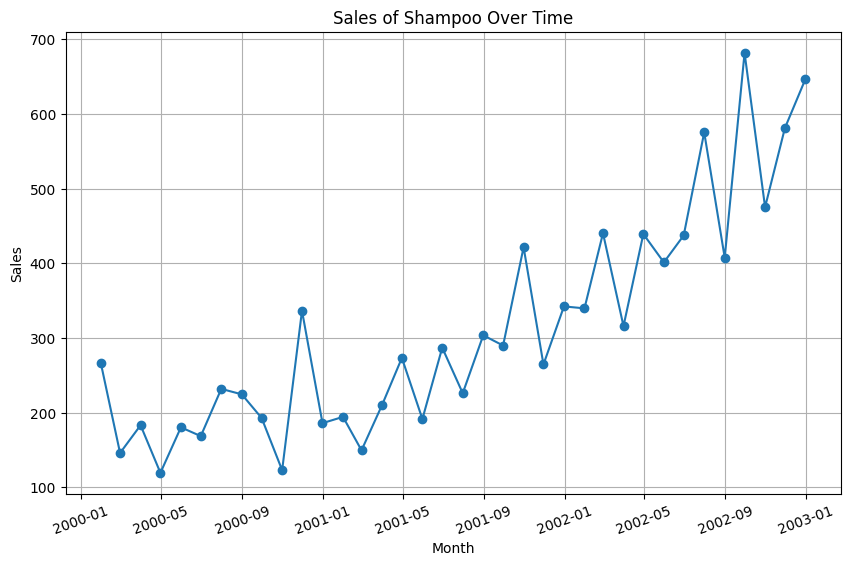

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(dt.index,dt['Sales of shampoo over a three year period'], marker='o', linestyle = 'solid')
plt.title('Sales of Shampoo Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=20)
plt.grid(True)
plt.show()

**5. Decomposition:**

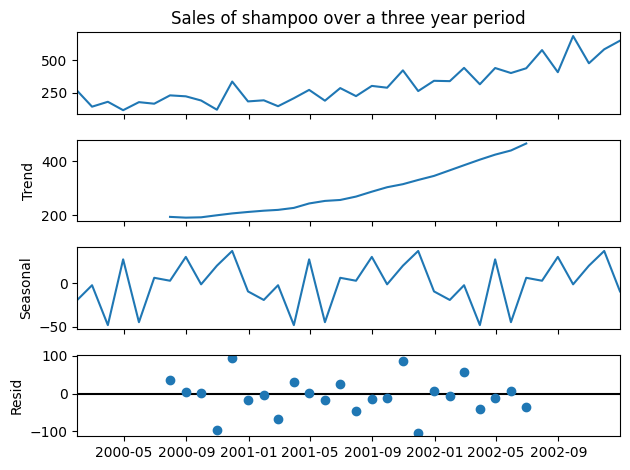

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dt['Sales of shampoo over a three year period'], model = 'attitive')
fig=decomposition.plot()
plt.show()

**6. Forecasting with ARIMA:**

In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(dt['Sales of shampoo over a three year period'])
print('ADF Statistics: ', adf_test[0])
print('p-value: ', adf_test[1])

ADF Statistics:  3.060142083641181
p-value:  1.0


**7. Fit an ARIMA Model:**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dt['Sales of shampoo over a three year period'], order=(1,1,1))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Wed, 13 Mar 2024   AIC                            406.782
Time:                                               01:04:19   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

**8. Forecasting Future Values:**

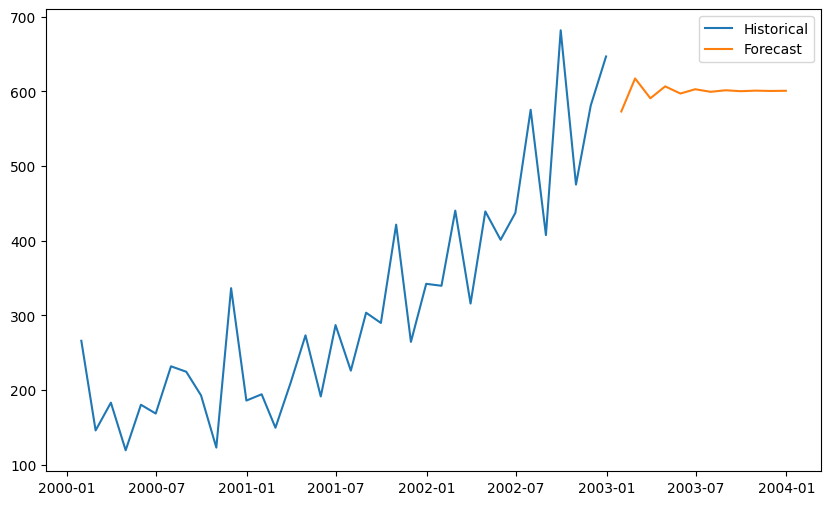

In [ ]:
forecast = results.forecast(steps=12)

plt.figure(figsize=(10,6))
plt.plot(dt.index,dt['Sales of shampoo over a three year period'], label = 'Historical')
plt.plot(forecast.index, forecast, label='Forecast')
plt.legend()
plt.show()